# Лабораторная работа 2.2.3
# Определение теплопроводности газов при атмосферном давлении

## Теория

Будем снимать зависимость напряжения на нити $U_H$ от напряжения на эталонном сопротивлении $U_0$ для разных температур. Из этих данных посчитаем тепловую мощность $Q = U_H U_0/R_0$ и сопротивление нити $R_H = R_0 U_H/U_0$ для каждой точки. Построим зависимости мощности от сопротивления для каждой температуры. По этим графикам найдем сопротивления при нулевой мощности, т.е. при температуре термостата.
Затем, построив зависимость сопротивления от температуры, сможем найти $\frac{dQ}{dT}=\frac{dQ}{dR}\frac{dR}{dT}$, с помощью которого вычислим коэффициент теплопроводности по формуле
$$ \kappa = \frac{dQ}{dT} \frac 1{2\pi L} \ln{\frac{r_2}{r_1}} $$
Построив график $\ln{\kappa}(\ln{T})$, найдем показатель степени $\beta$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import smartlab as sl

## Измерения

Снимем зависимость $U_H(U_0)$ для 5 разных температур

In [6]:
data = pd.read_csv('data.tsv', delimiter='\t')
data['$U_0, V$'] = np.array([0.1, 0.2, 0.5, 0.75, 1, 1.25, 1.5])
data

,"$U_H^1, V$","$U_H^2, V$","$U_H^3, V$","$U_H^4, V$","$U_H^5, V$","$U_0, V$"
0,0.1012,0.1046,0.1079,0.1111,0.1145,0.10
1,0.2027,0.2094,0.2160,0.2225,0.2292,0.20
2,0.5098,0.5266,0.5431,0.5596,0.5763,0.50
3,0.7720,0.7971,0.8220,0.8469,0.8719,0.75
4,1.0429,1.0765,1.1098,1.1430,1.1766,1.00
5,1.3259,1.3683,1.4096,1.4515,1.4938,1.25
6,1.6244,1.6755,1.7257,1.7763,1.8267,1.50


## Обработка

In [7]:
table = pd.DataFrame()
table['$R_1, \\Omega$'] = data.ix[:, 0] / data.ix[:, 5] * 10
table['$Q_1, W$'] = data.ix[:, 0] * data.ix[:, 5] * 0.1
table['$R_2, \\Omega$'] = data.ix[:, 1] / data.ix[:, 5] * 10
table['$Q_2, W$'] = data.ix[:, 1] * data.ix[:, 5] * 0.1
table['$R_3, \\Omega$'] = data.ix[:, 2] / data.ix[:, 5] * 10
table['$Q_3, W$'] = data.ix[:, 2] * data.ix[:, 5] * 0.1
table['$R_4, \\Omega$'] = data.ix[:, 3] / data.ix[:, 5] * 10
table['$Q_4, W$'] = data.ix[:, 3] * data.ix[:, 5] * 0.1
table['$R_5, \\Omega$'] = data.ix[:, 4] / data.ix[:, 5] * 10
table['$Q_5, W$'] = data.ix[:, 4] * data.ix[:, 5] * 0.1
table

,"$R_1, \Omega$","$Q_1, W$","$R_2, \Omega$","$Q_2, W$","$R_3, \Omega$","$Q_3, W$","$R_4, \Omega$","$Q_4, W$","$R_5, \Omega$","$Q_5, W$"
0,10.120000,0.001012,10.4600,0.001046,10.790000,0.001079,11.110,0.001111,11.450000,0.001145
1,10.135000,0.004054,10.4700,0.004188,10.800000,0.004320,11.125,0.004450,11.460000,0.004584
2,10.196000,0.025490,10.5320,0.026330,10.862000,0.027155,11.192,0.027980,11.526000,0.028815
3,10.293333,0.057900,10.6280,0.059783,10.960000,0.061650,11.292,0.063518,11.625333,0.065393
4,10.429000,0.104290,10.7650,0.107650,11.098000,0.110980,11.430,0.114300,11.766000,0.117660
5,10.607200,0.165738,10.9464,0.171038,11.276800,0.176200,11.612,0.181438,11.950400,0.186725
6,10.829333,0.243660,11.1700,0.251325,11.504667,0.258855,11.842,0.266445,12.178000,0.274005


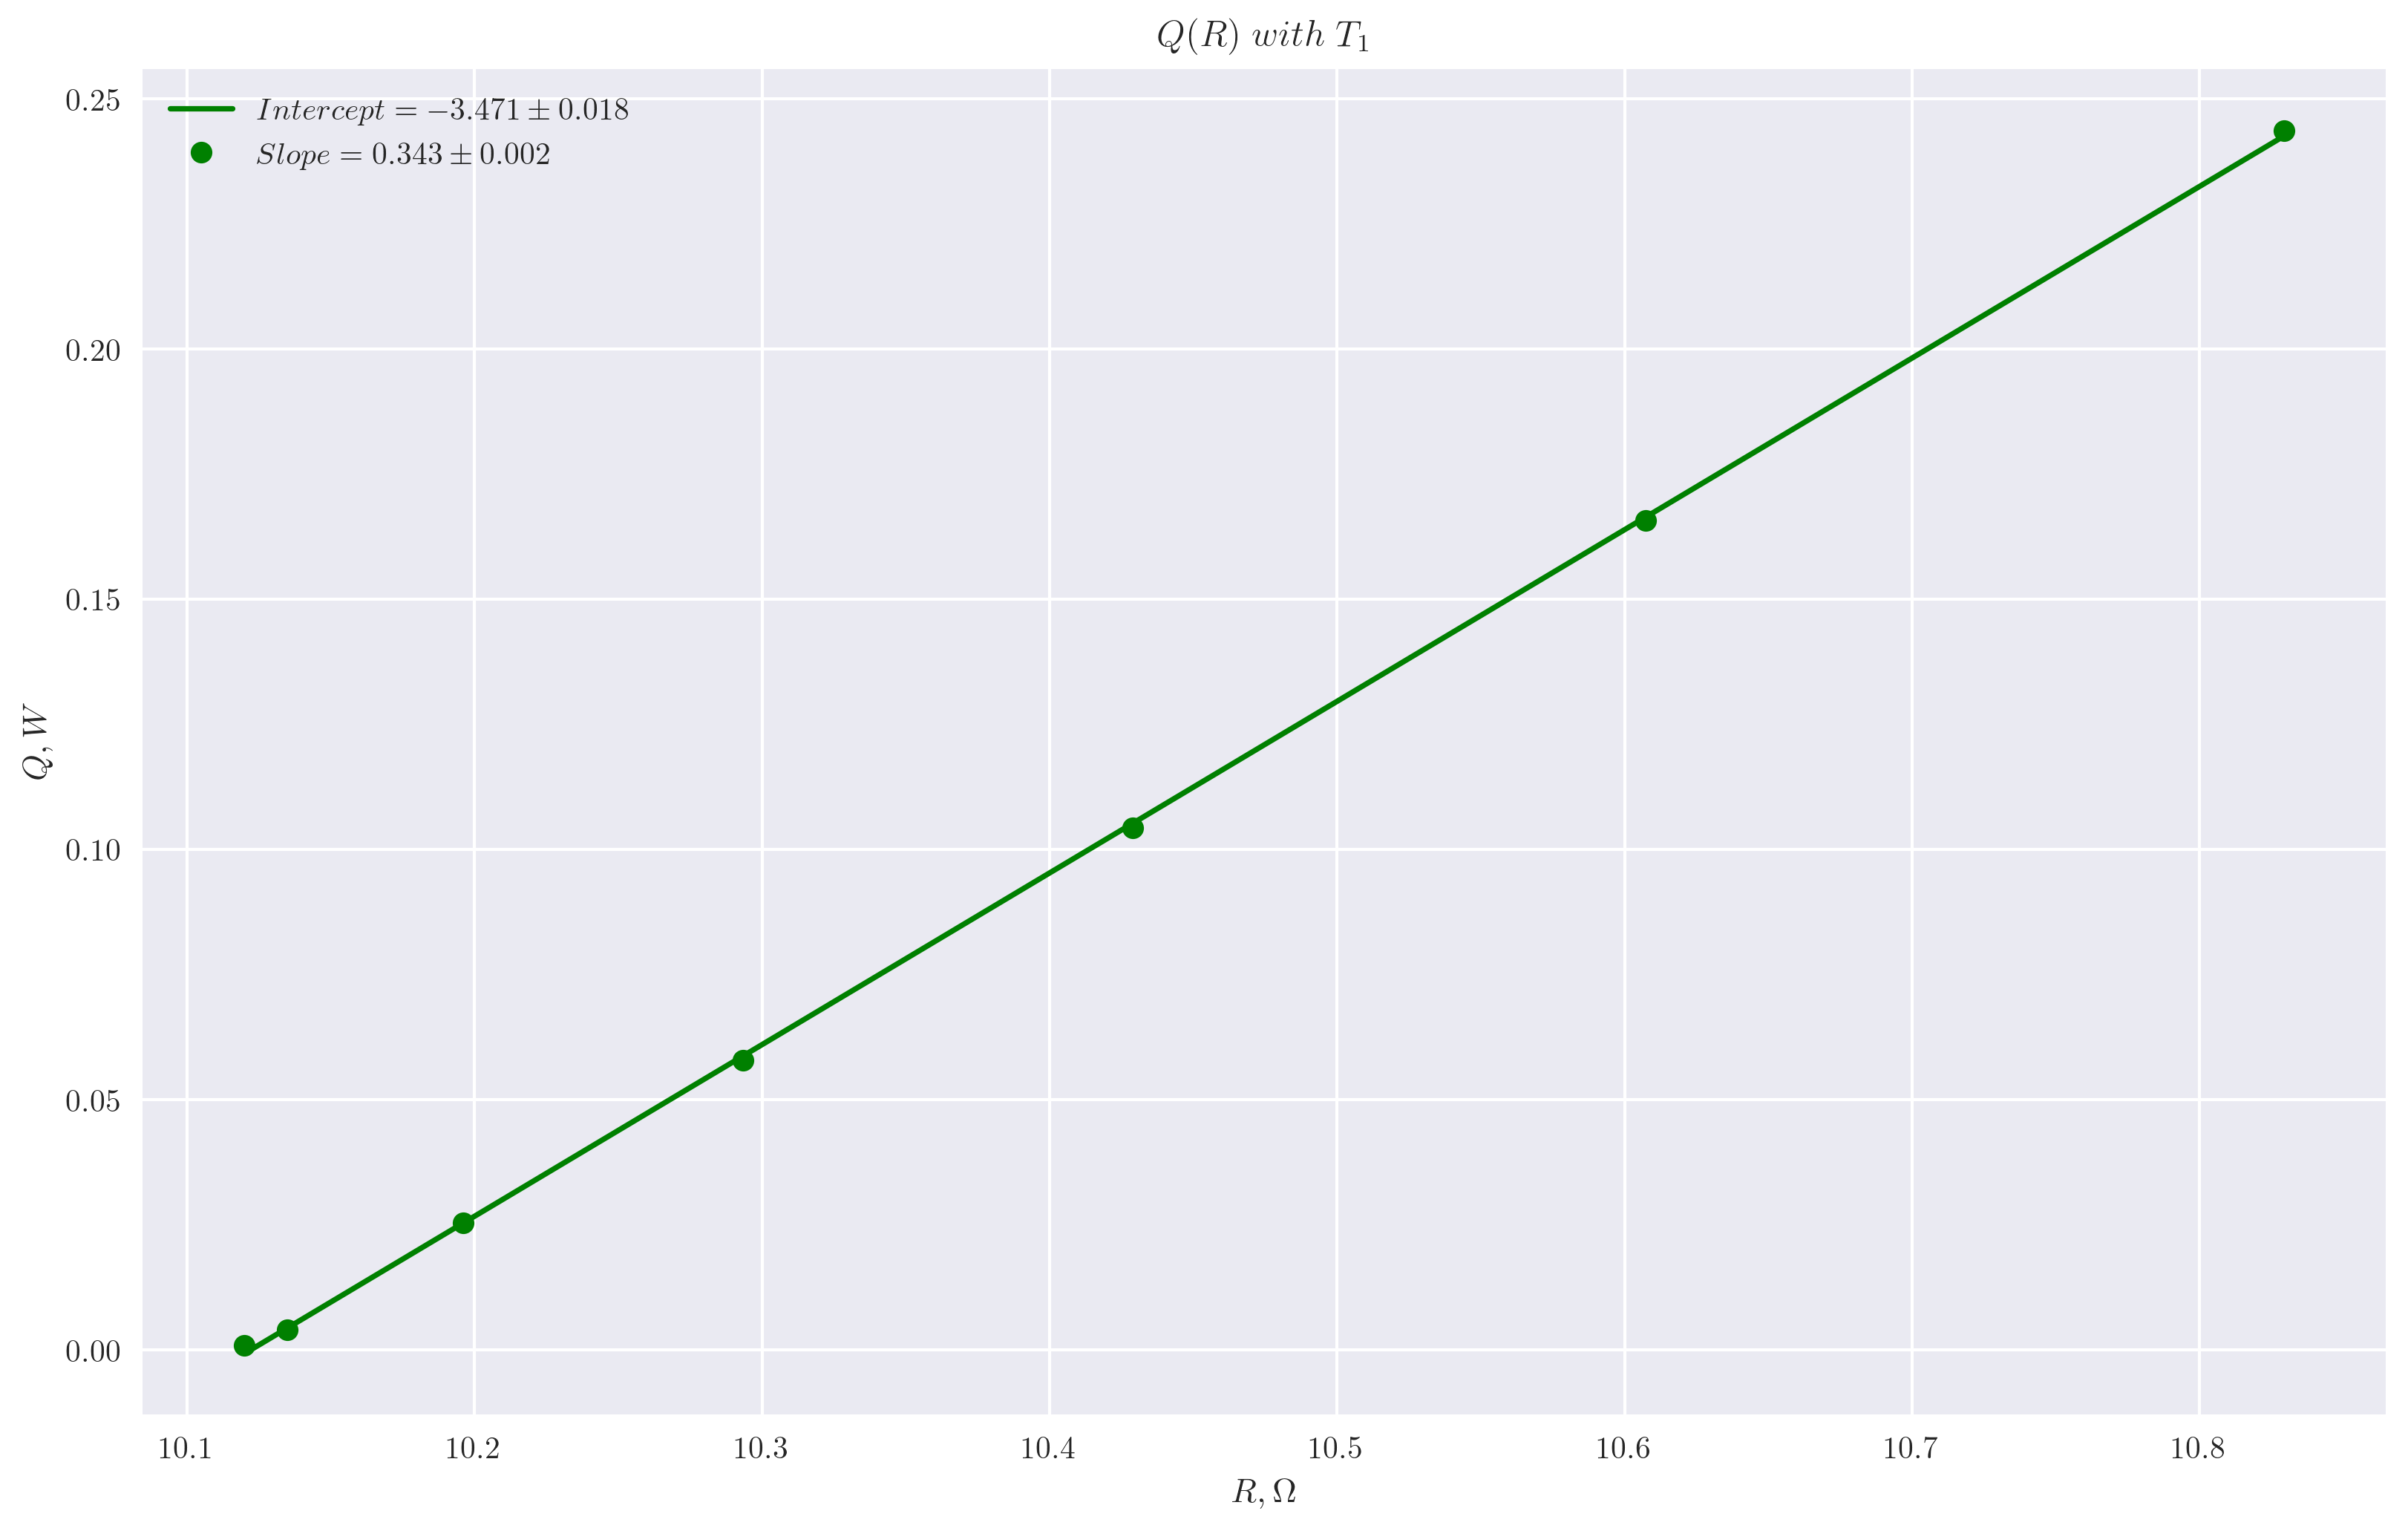

In [12]:
sl.linplot(table.ix[:, 0], table.ix[:, 1], xlabel='$R, \\Omega$', ylabel='$Q, W$', title='$Q(R)\ with\ T_1$')

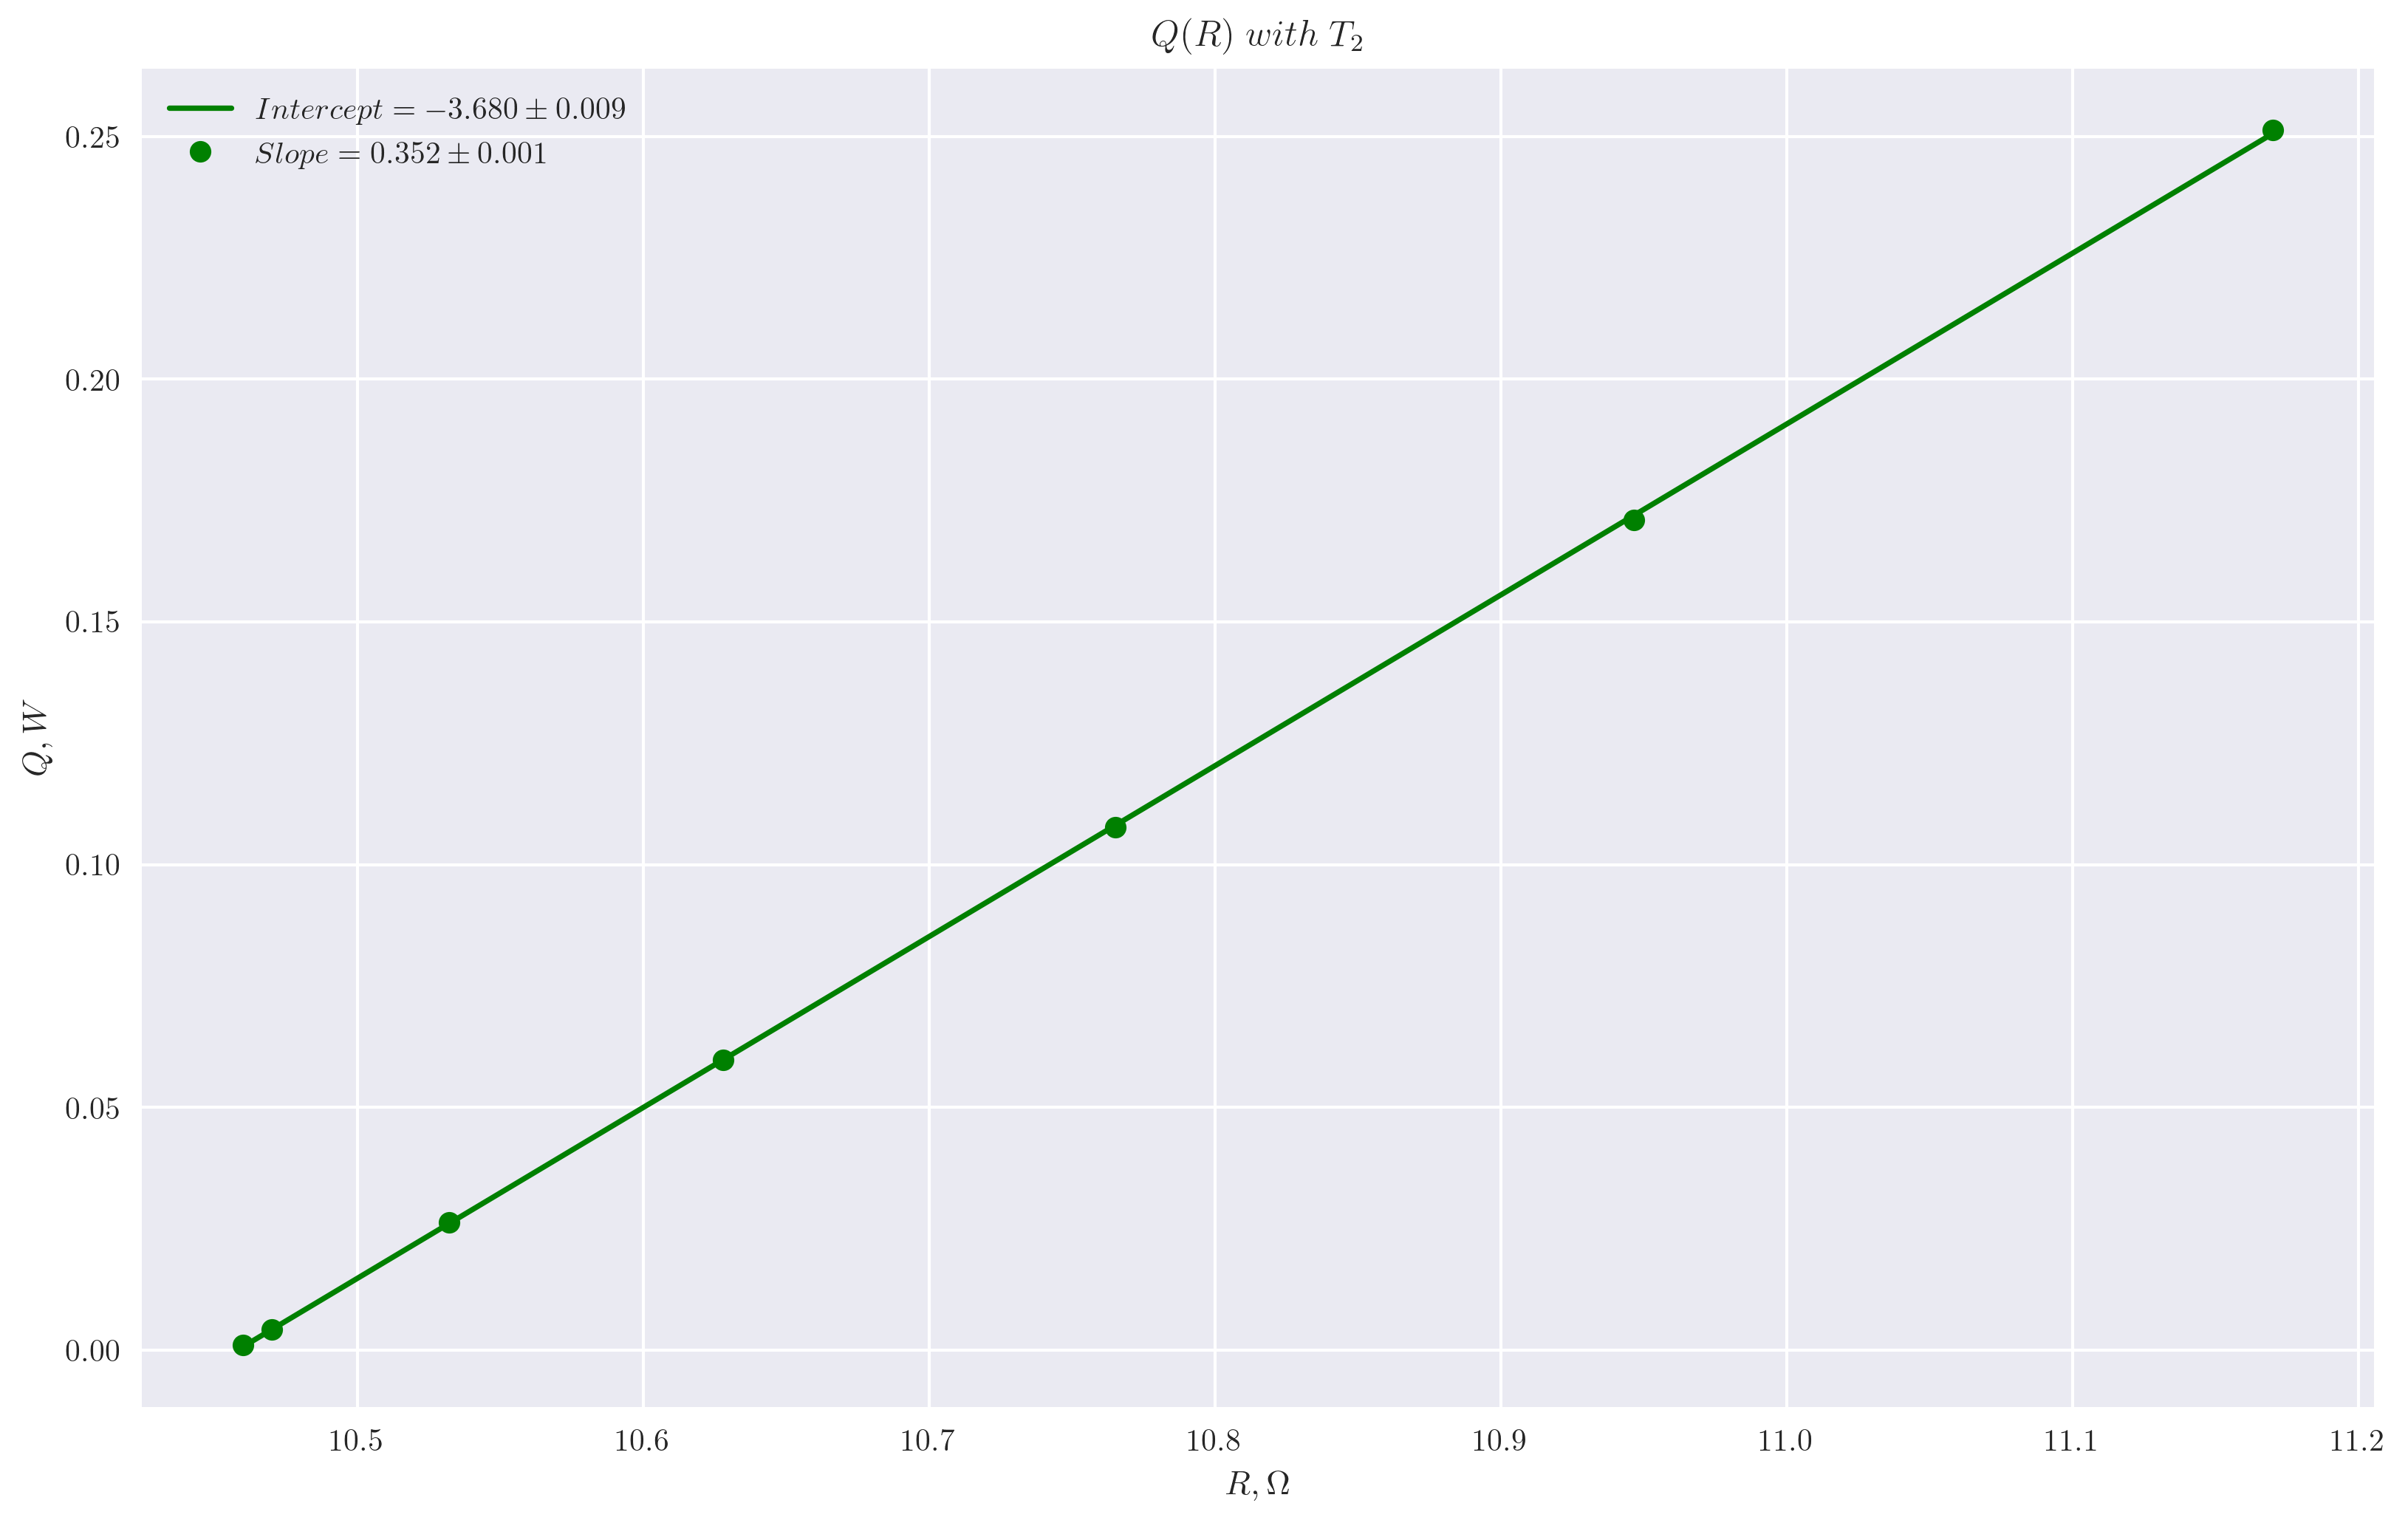

In [13]:
sl.linplot(table.ix[:, 2], table.ix[:, 3], xlabel='$R, \\Omega$', ylabel='$Q, W$', title='$Q(R)\ with\ T_2$')

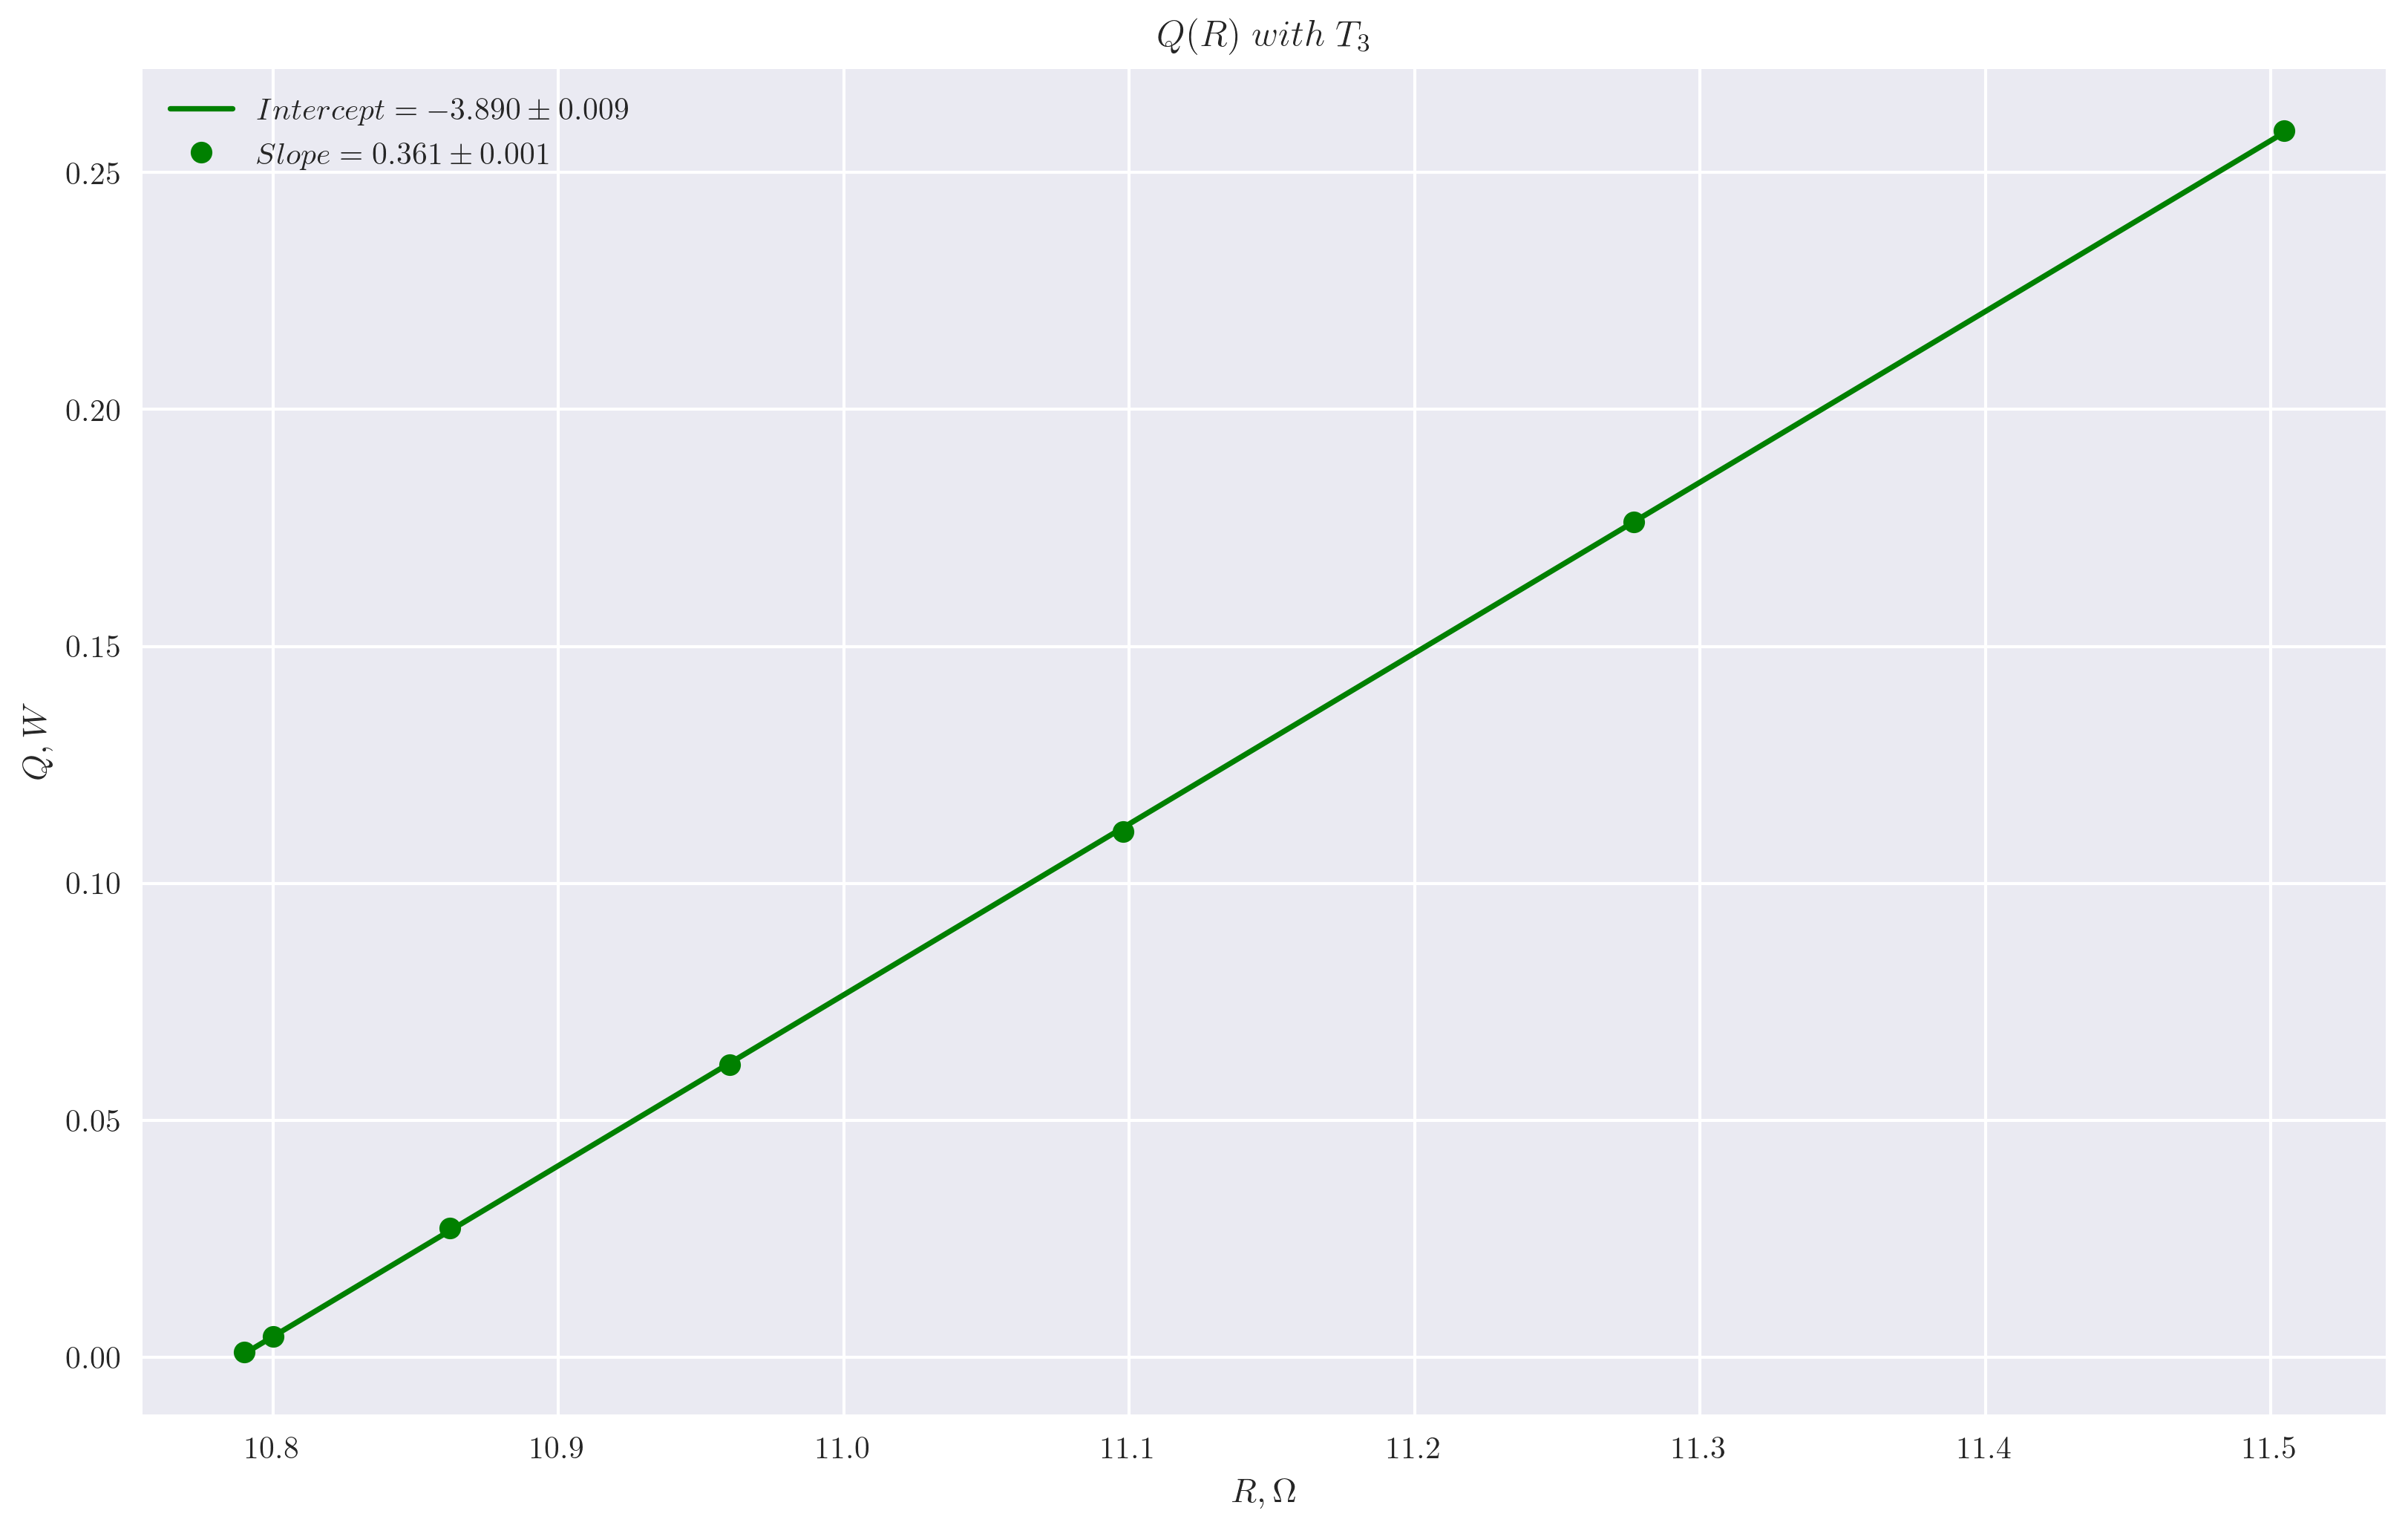

In [14]:
sl.linplot(table.ix[:, 4], table.ix[:, 5], xlabel='$R, \\Omega$', ylabel='$Q, W$', title='$Q(R)\ with\ T_3$')

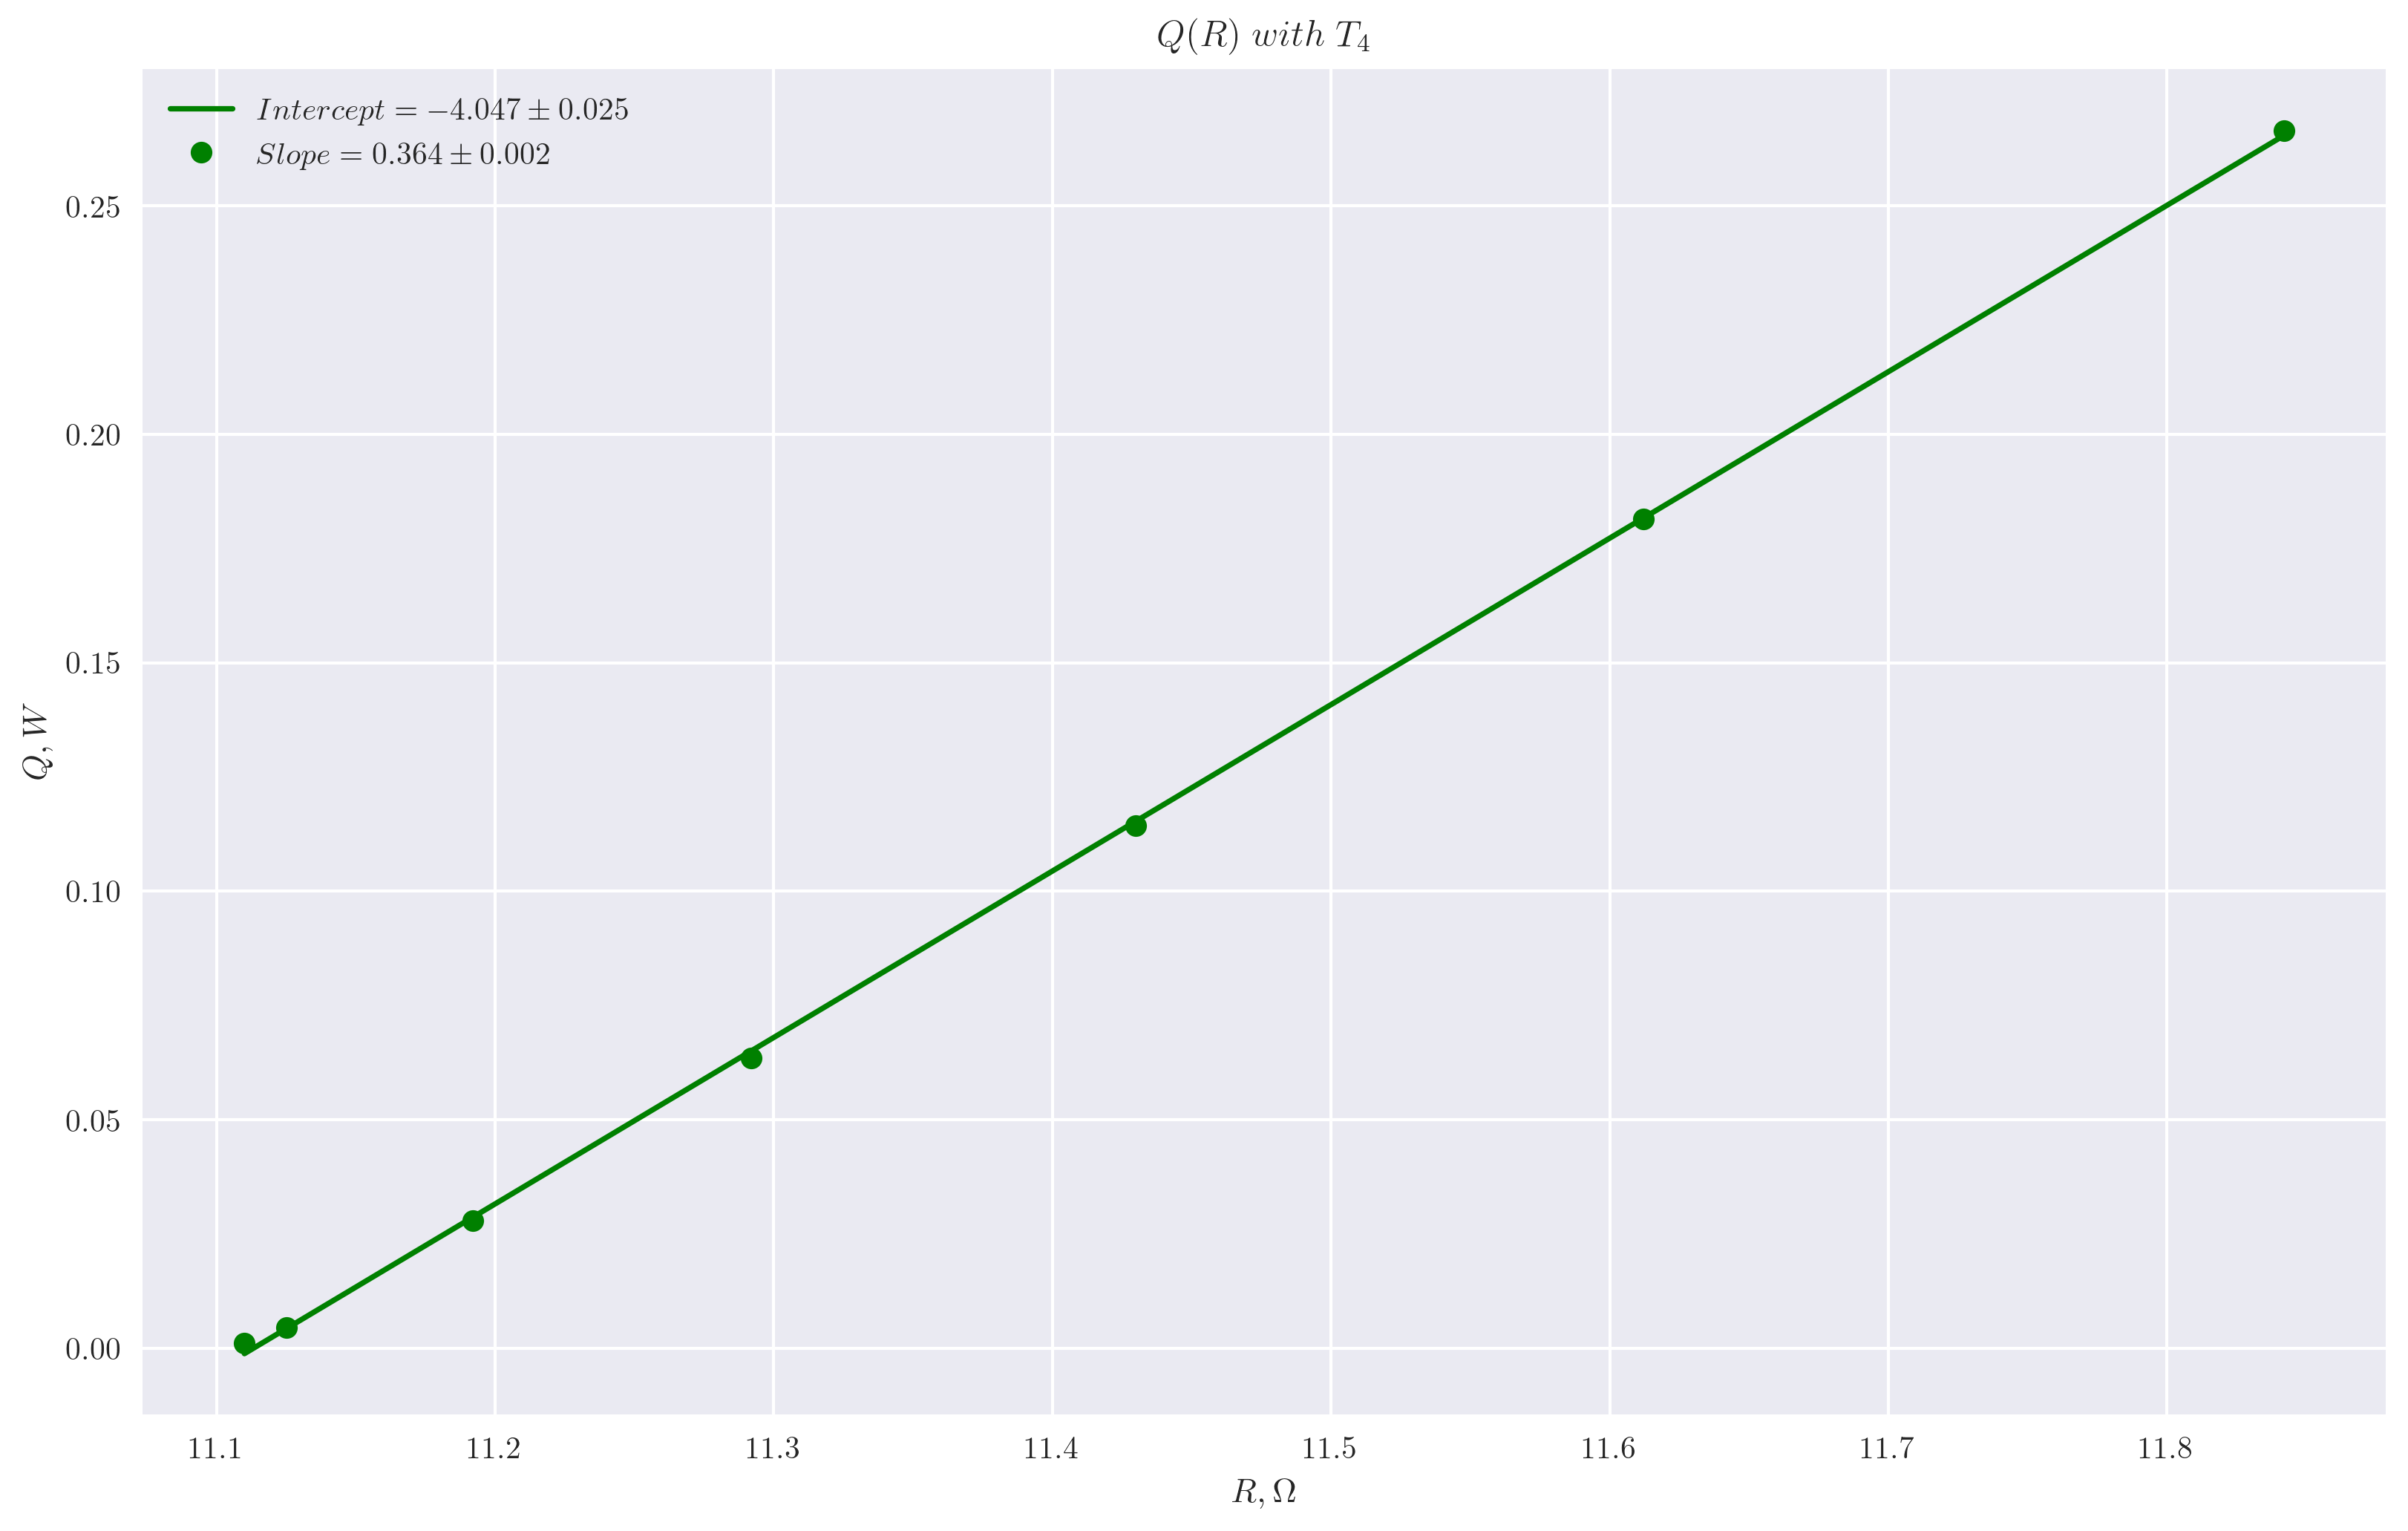

In [15]:
sl.linplot(table.ix[:, 6], table.ix[:, 7], xlabel='$R, \\Omega$', ylabel='$Q, W$', title='$Q(R)\ with\ T_4$')

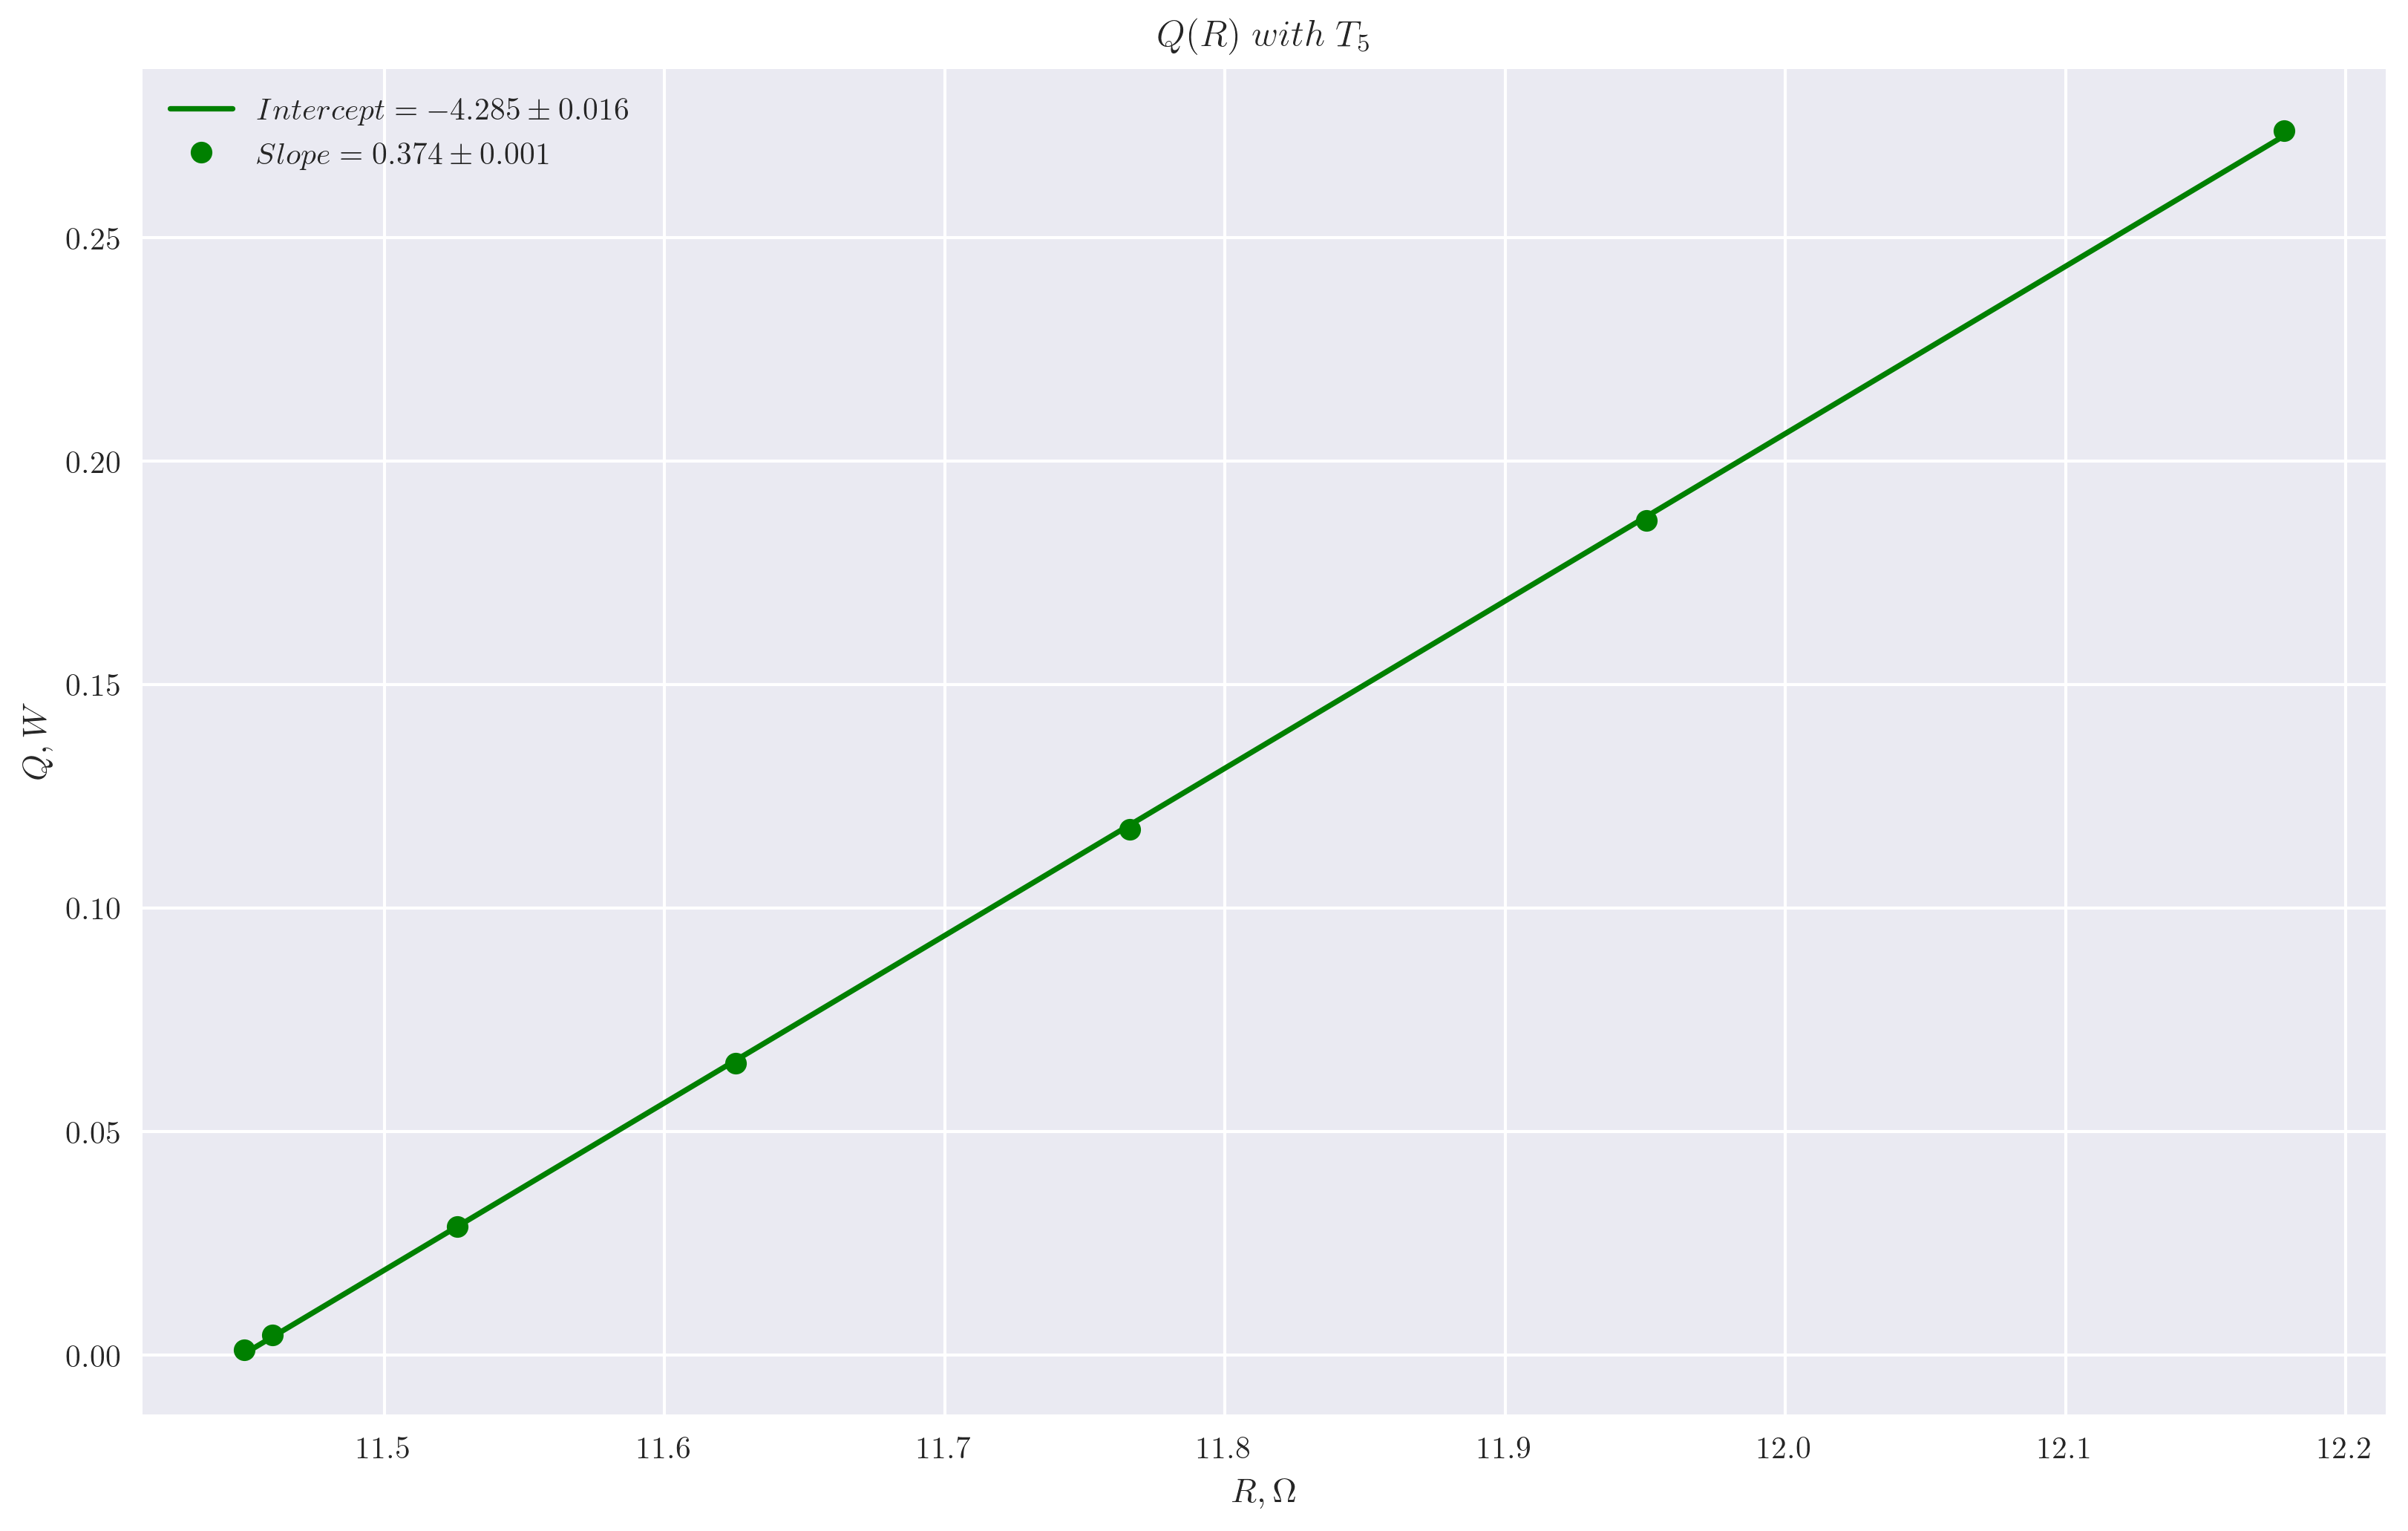

In [16]:
sl.linplot(table.ix[:, 8], table.ix[:, 9], xlabel='$R, \\Omega$', ylabel='$Q, W$', title='$Q(R)\ with\ T_5$')

Так как зависимости линейные, то
$$ Q = Intercept + Slope\cdot R \Longrightarrow R_0 = -\frac{Intercept}{Slope} $$

In [22]:
rtable = pd.DataFrame()
rtable['$R_0, \\Omega$'] = np.array([3.47, 3.68, 3.89, 4.05, 4.29]) / np.array([0.343, 0.352, 0.361, 0.364, 0.374])
rtable['$T, C$'] = np.array([25.8, 35.0, 44.0, 53.0, 62.1])
rtable

,"$R_0, \Omega$","$T, C$"
0,10.116618,25.8
1,10.454545,35.0
2,10.775623,44.0
3,11.126374,53.0
4,11.470588,62.1


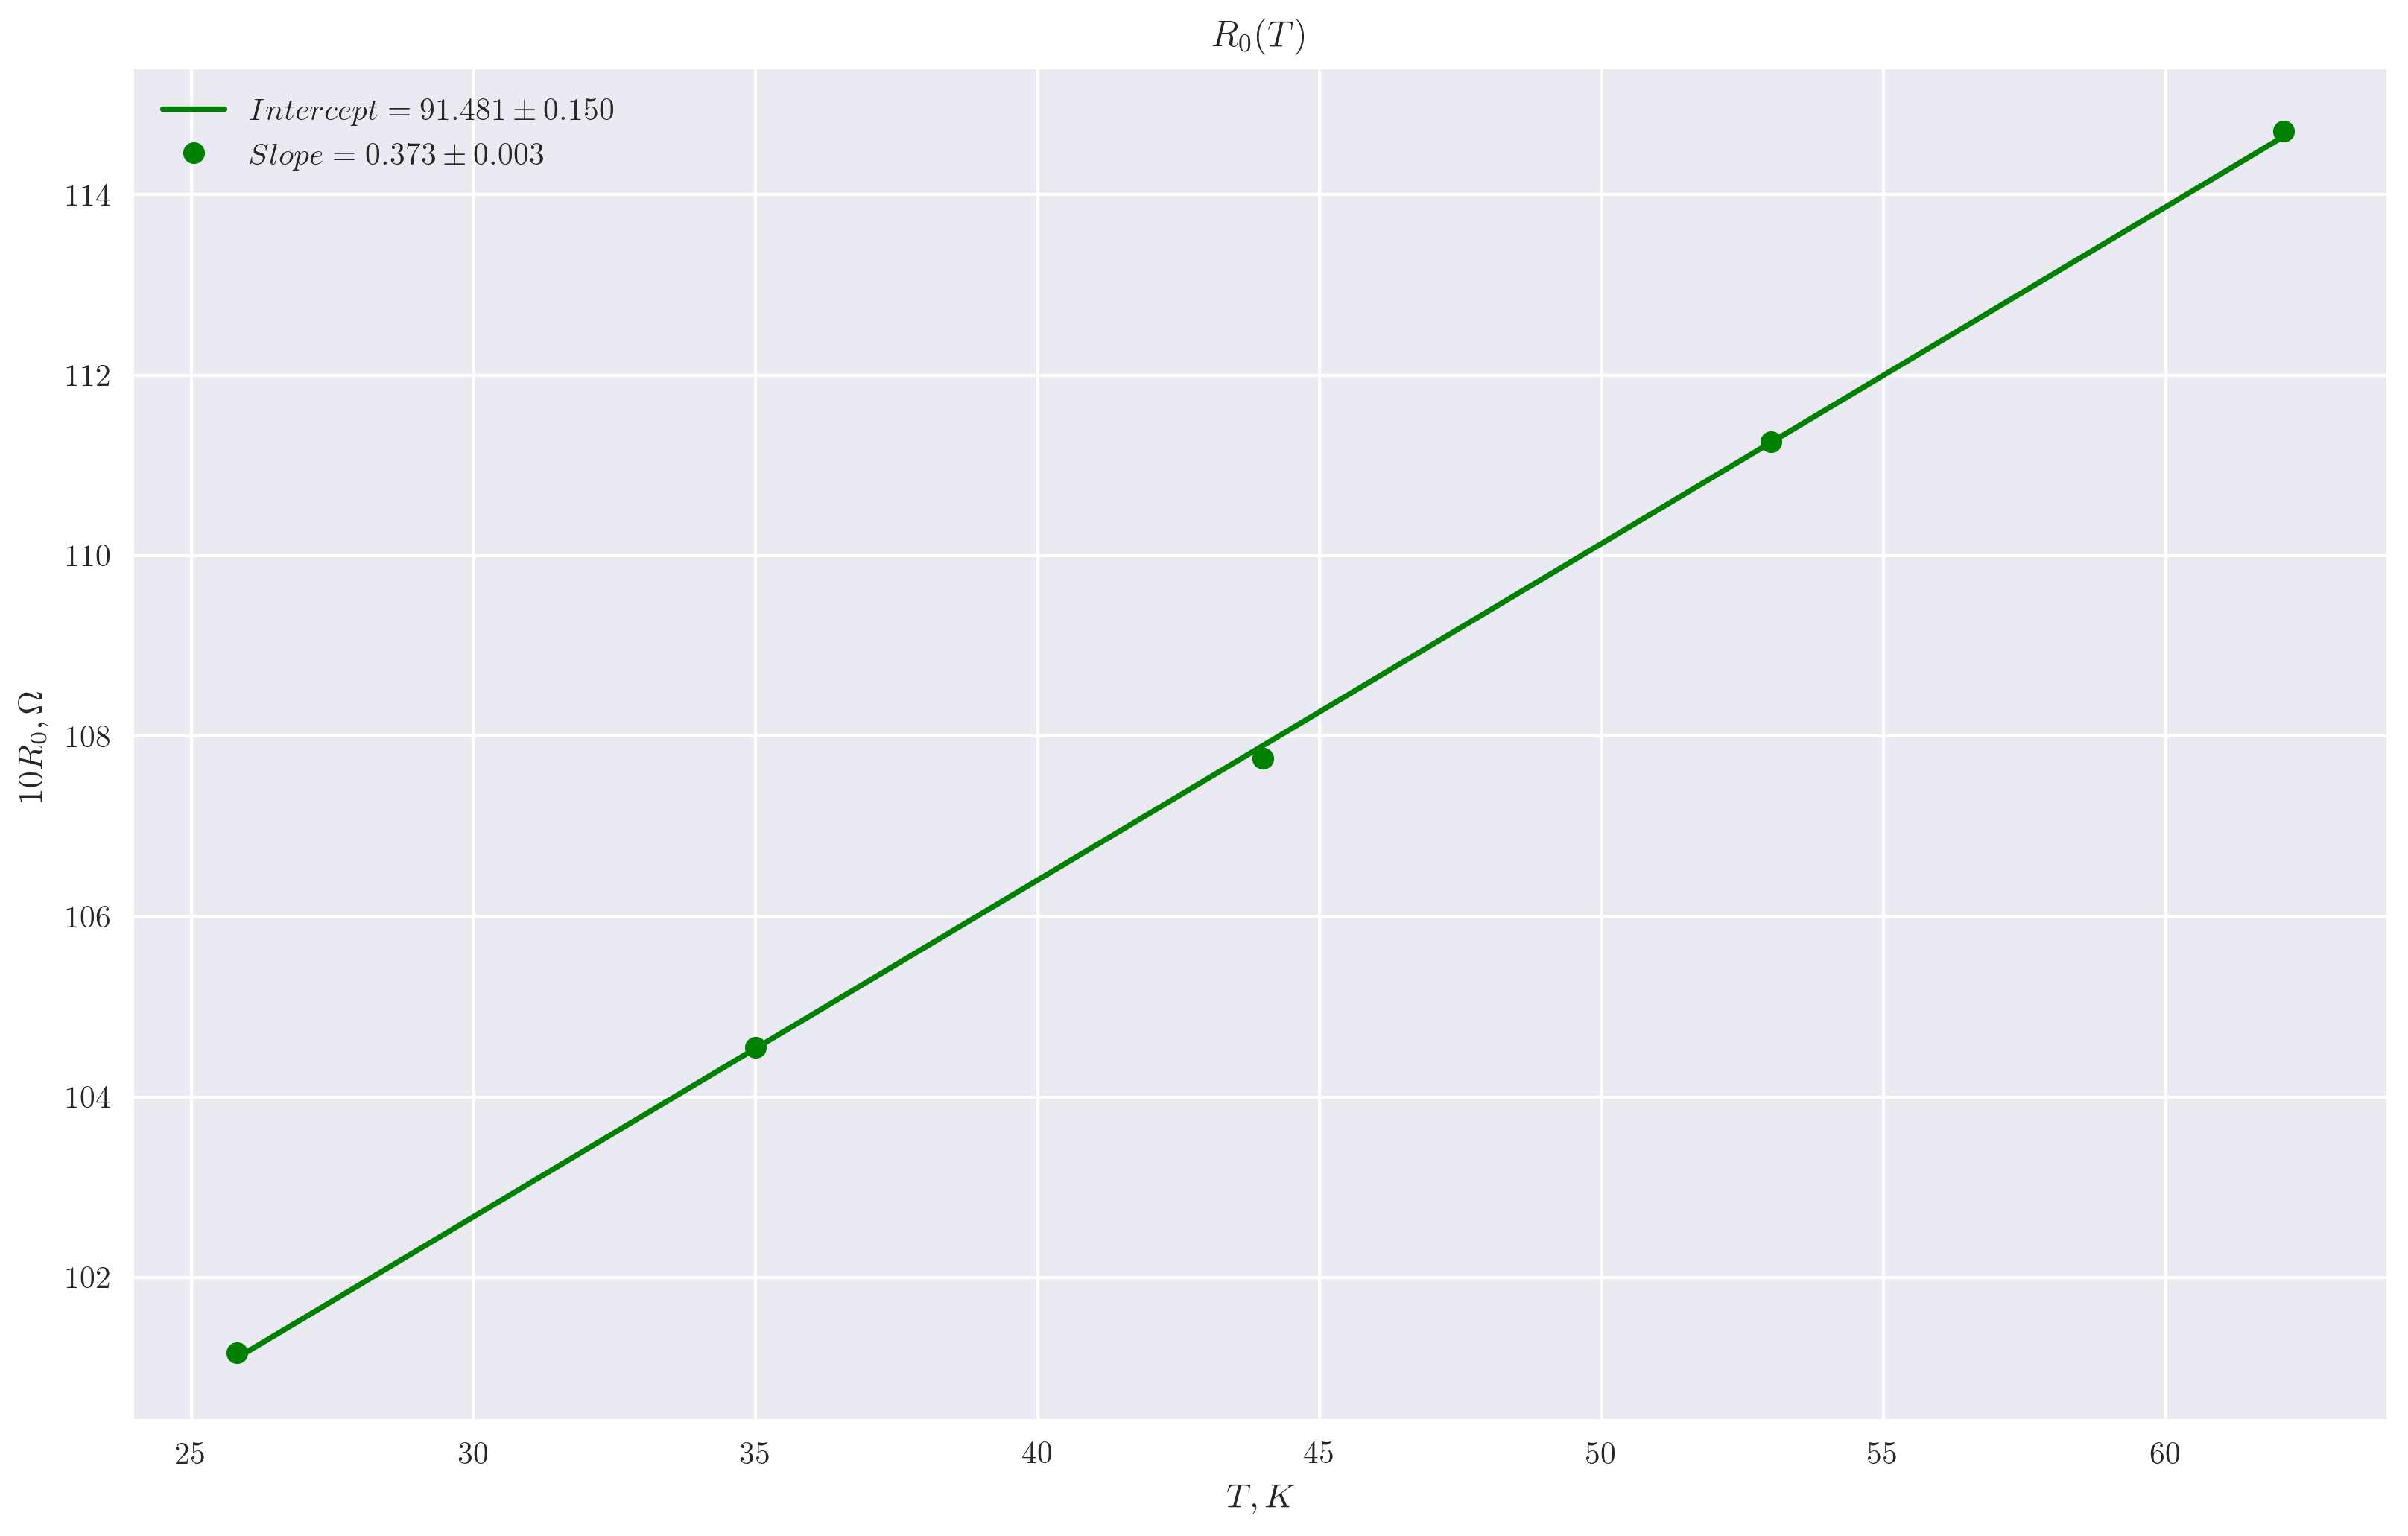

In [23]:
sl.linplot(rtable['$T, C$'], 10*rtable['$R_0, \\Omega$'], xlabel='$T, K$', ylabel='$10R_0, \\Omega$', title='$R_0(T)$')

Из графика 
$$ \frac{dR}{dT}=(3.73\,\pm\,0.03)\cdot 10^{-2}\ \frac{\Omega}{K} $$
$$ R_{273} = R_0(T=25 C) - \frac{dR}{dT}\cdot 25 = (9.2\,\pm\,0.1)\ \Omega $$
$$ \alpha = \frac 1 {R_{273}} \frac{dR}{dT} = (4.05\,\pm\,0.05)\cdot 10^{-3}\ K^{-1} $$

In [25]:
coef = 1/(2*np.pi*0.355)*np.log(10/0.055)*0.0373
coef

0.087007168631526313

In [27]:
ktable = pd.DataFrame()
ktable['$T, K$'] = rtable['$T, C$'] + 273
ktable['$\\kappa, \\frac{J}{m\\cdot K}$'] = coef * np.array([0.343, 0.352, 0.361, 0.364, 0.374])
ktable

,"$T, K$","$\kappa, \frac{J}{m\cdot K}$"
0,298.8,0.029843
1,308.0,0.030627
2,317.0,0.031410
3,326.0,0.031671
4,335.1,0.032541


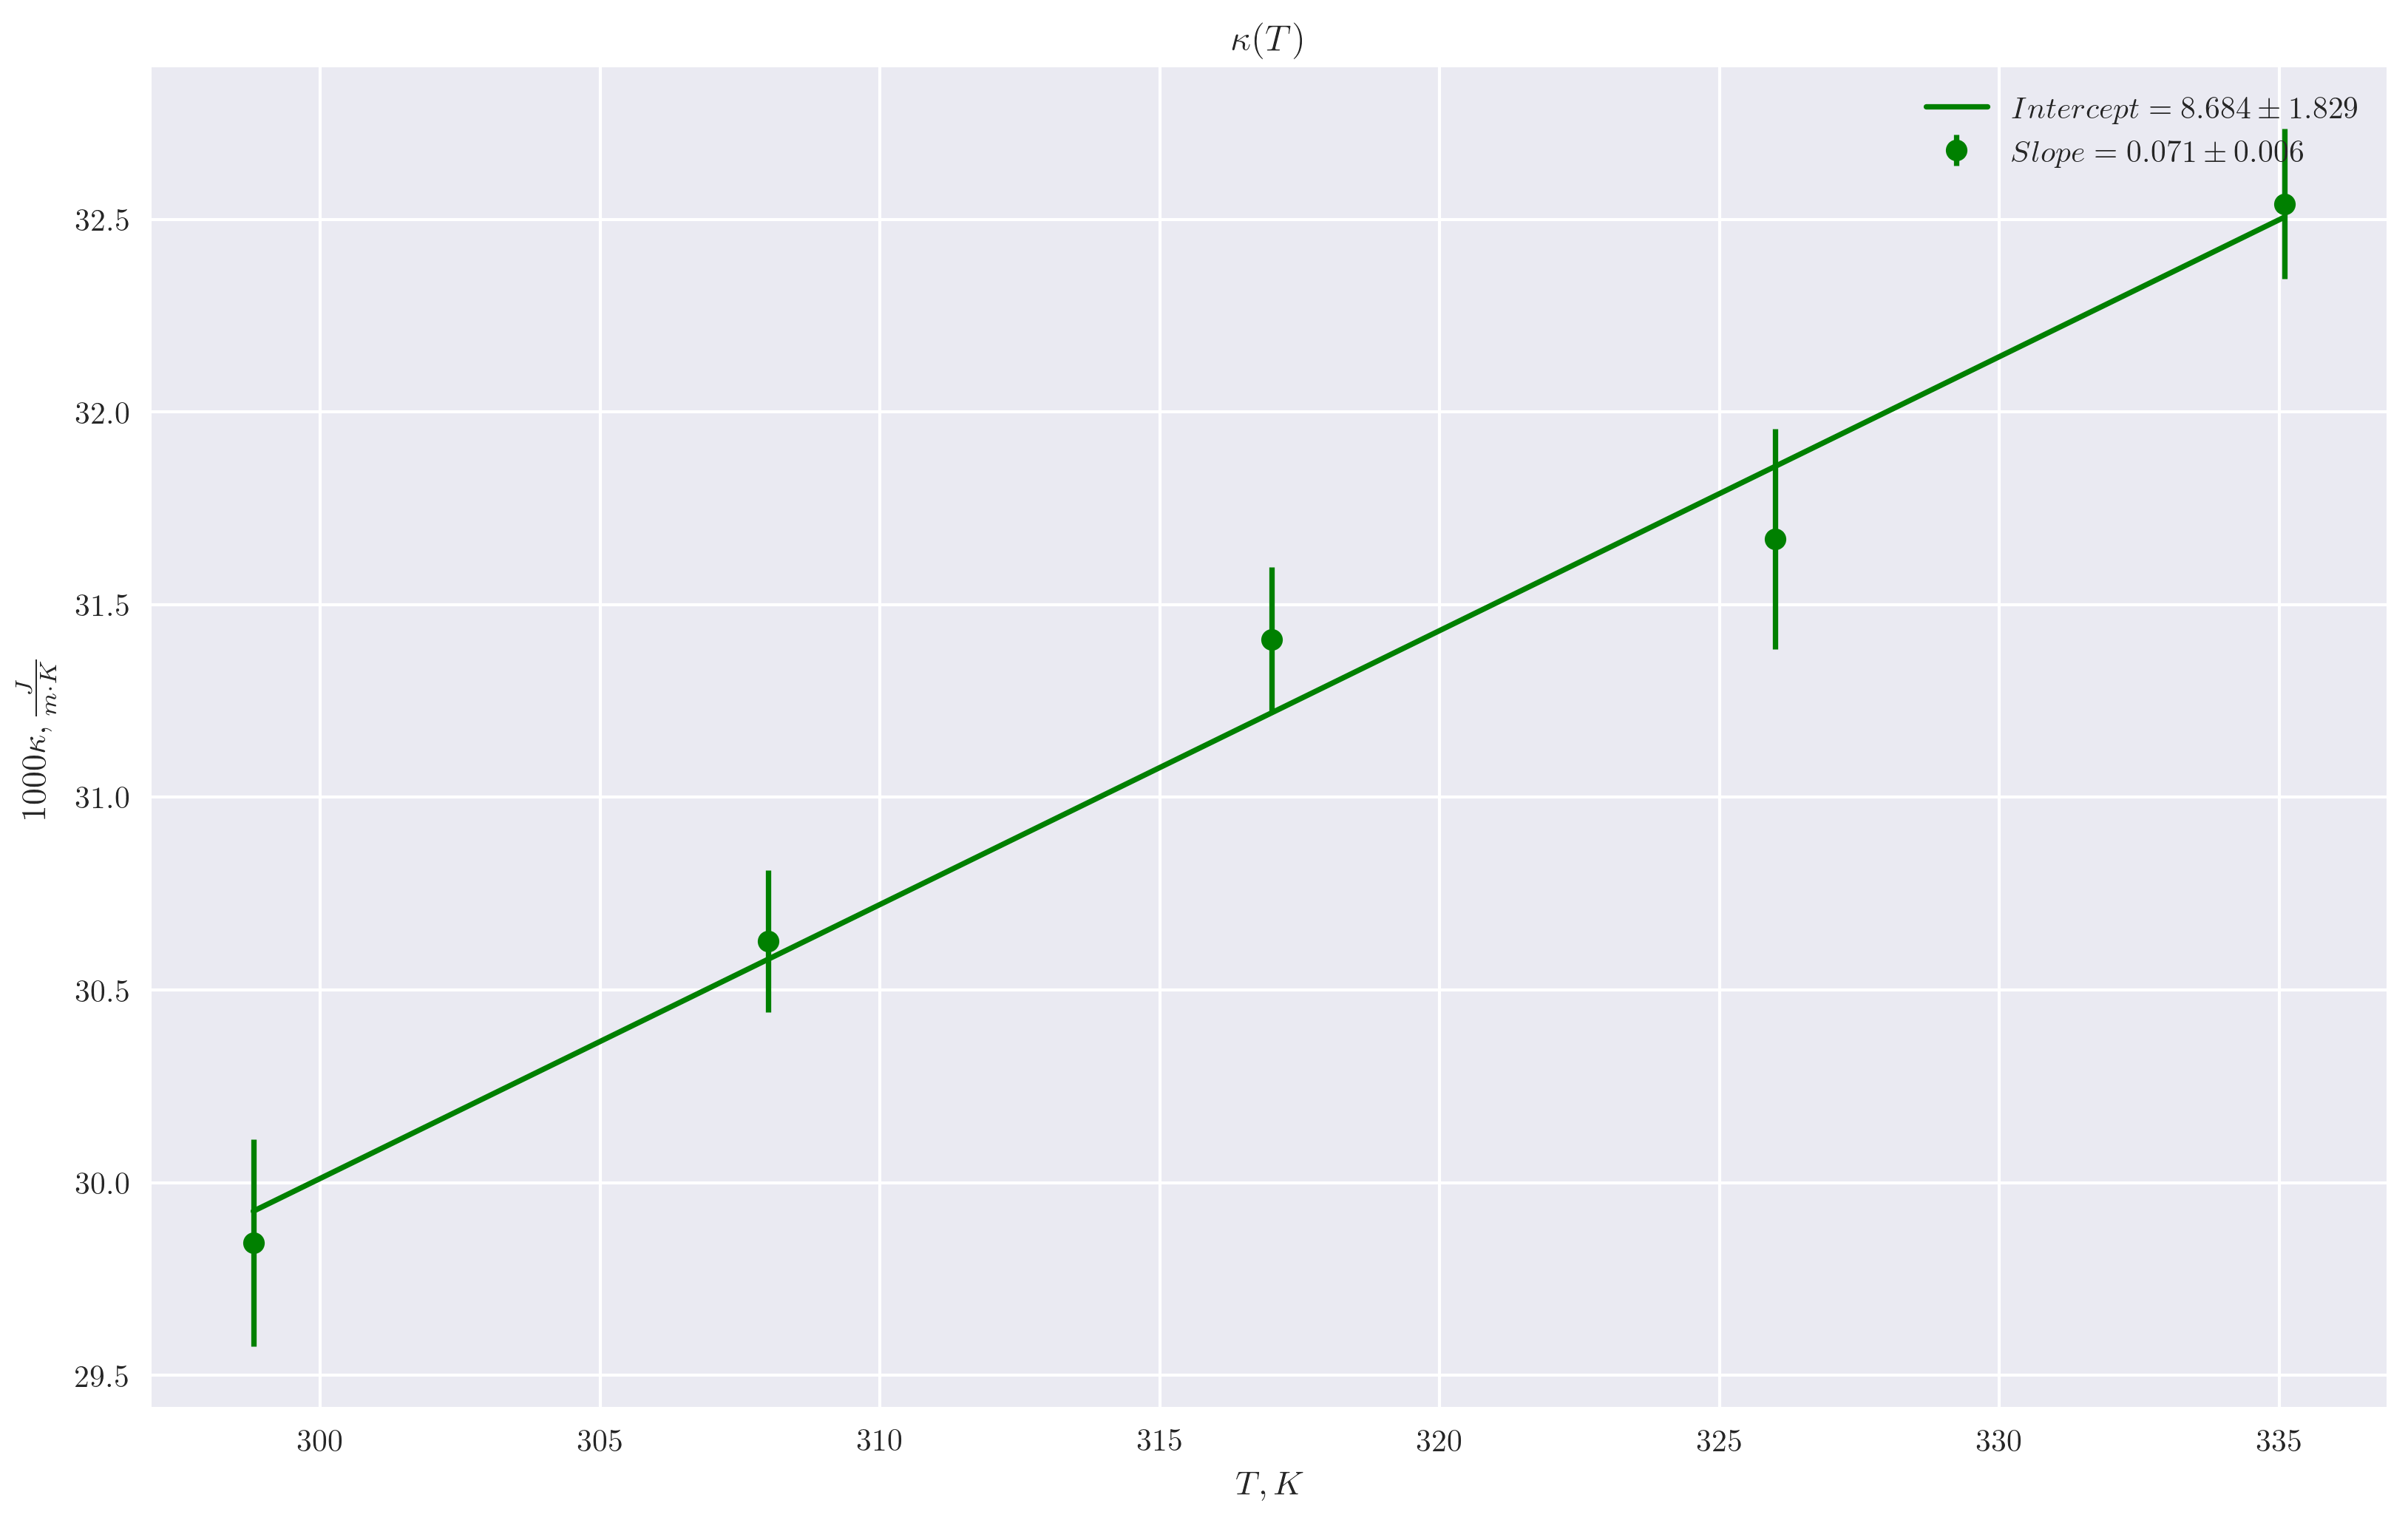

In [32]:
yerr=np.array([9, 6, 6, 9, 6]) * ktable['$\\kappa, \\frac{J}{m\\cdot K}$']
sl.linplot(ktable['$T, K$'], 1000*ktable['$\\kappa, \\frac{J}{m\\cdot K}$'], xlabel='$T, K$', 
           ylabel='$1000\\kappa, \\frac{J}{m\\cdot K}$', title='$\\kappa(T)$', yerr=yerr)

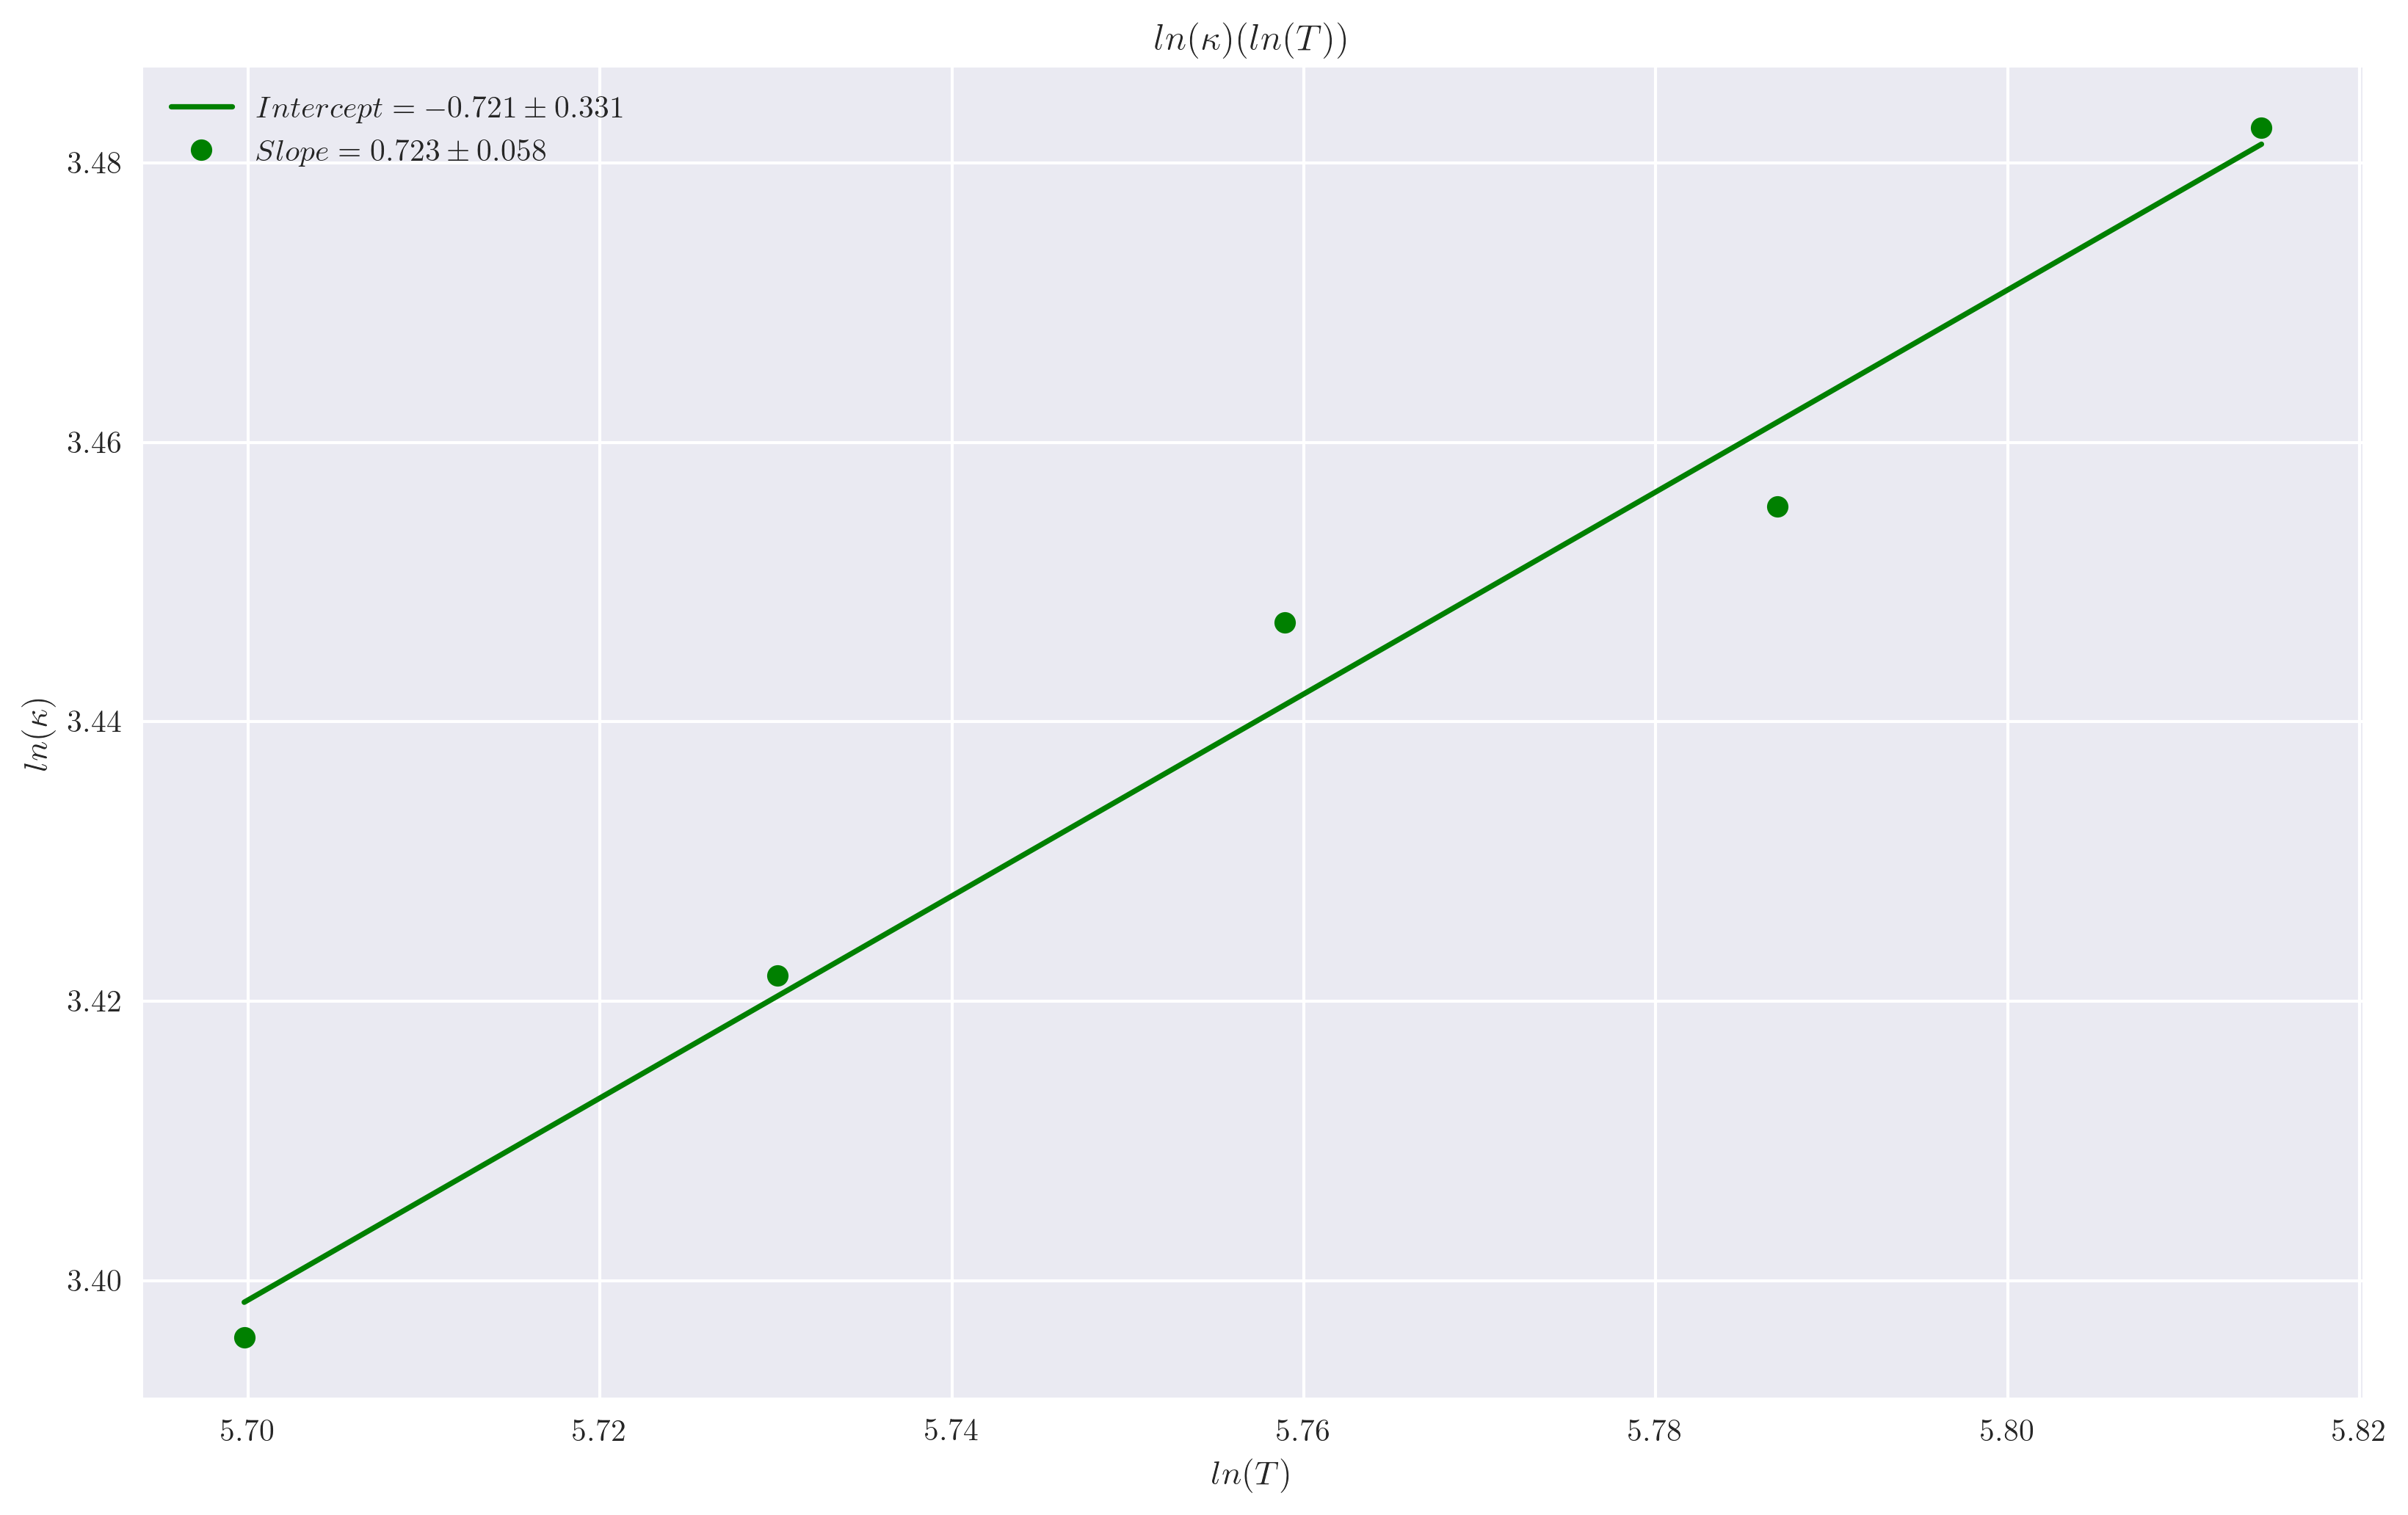

In [36]:
sl.logplot(ktable['$T, K$'], 1000*ktable['$\\kappa, \\frac{J}{m\\cdot K}$'], xlabel='$ln(T)$', 
           ylabel='$ln(\\kappa)$', title='$ln(\\kappa)(ln(T))$')

Из графика в логарифмических координатах получаем показатель степени
$$ \beta=0.72\,\pm\,0.05 $$

## Выводы

Температурный коэффициент сопротивления $\alpha=(4.05\,\pm\,0.05)\cdot 10^{-3}\ K^{-1}$ довольно хорошо совпадает с настоящим $\alpha_0=4.58\cdot 10^{-3}\ K^{-1}$
Из теории известно, что 
$$ \kappa \sim \overline{v} \sim \sqrt{T} \Longrightarrow \beta_{th}=0.5 $$
Завышенный результат может быть связан с тем, что при выводе основной формулы пренебрегалось зависимостью теплопроводности от температуры.